In [1]:
import sys
sys.path.append('..')

import numpy as np
from sklearn.datasets import make_moons, make_blobs, make_circles
import matplotlib.pyplot as plt

import mdgrad
import mdgrad.nn as nn
import mdgrad.optim as optim

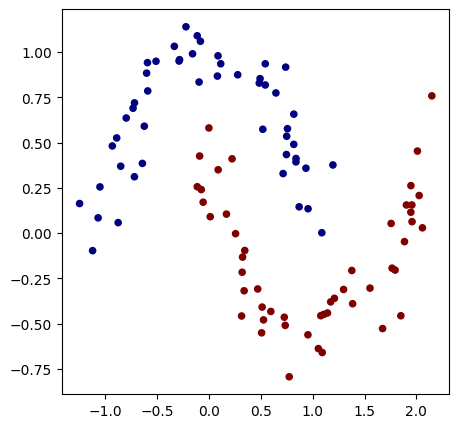

In [2]:
X, targets = make_moons(n_samples=100, noise=0.1)
targets = np.expand_dims(targets, axis=-1)
X, targets = mdgrad.tensor(X), mdgrad.tensor(targets)
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=targets.numpy(), s=20, cmap='jet')

In [3]:
X.shape, targets.shape

((100, 2), (100, 1))

In [4]:
model = nn.Sequential(
    nn.Linear(2, 20),
    nn.ReLU(),
    nn.Linear(20, 50), 
    nn.ReLU(),
    nn.Linear(50, 15),
    nn.ReLU(),
    nn.Linear(15, 1),
    nn.Sigmoid()
)

In [5]:
def accuracy(x, y):
    x = mdgrad.tensor([[1 if pred > 0.5 else 0 for pred in x]])
    y = y.reshape(x.shape)
    return mdgrad.sum(x.data == y.data) / 100

In [6]:
lr = 0.5
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, nesterov=True)

losses, accs = [], []

for i in range(100):
    preds = model(X)
    loss = loss_fn(preds, targets)
    acc = accuracy(preds, targets)
    if (i+1) % 10 == 0 or i == 0:
        print(f'Epoch: {i+1}\tLoss: {loss.data:.4f}\tAccuracy: {100 * acc[0][0]:.2f}%')
    
    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # track model performance
    losses.append(loss.data)
    accs.append(acc[0][0])

Epoch: 1	Loss: 0.3165	Accuracy: 24.00%
Epoch: 10	Loss: 0.0932	Accuracy: 87.00%
Epoch: 20	Loss: 0.0746	Accuracy: 89.00%
Epoch: 30	Loss: 0.0292	Accuracy: 98.00%
Epoch: 40	Loss: 0.0032	Accuracy: 100.00%
Epoch: 50	Loss: 0.0006	Accuracy: 100.00%
Epoch: 60	Loss: 0.0003	Accuracy: 100.00%
Epoch: 70	Loss: 0.0002	Accuracy: 100.00%
Epoch: 80	Loss: 0.0001	Accuracy: 100.00%
Epoch: 90	Loss: 0.0001	Accuracy: 100.00%
Epoch: 100	Loss: 0.0001	Accuracy: 100.00%


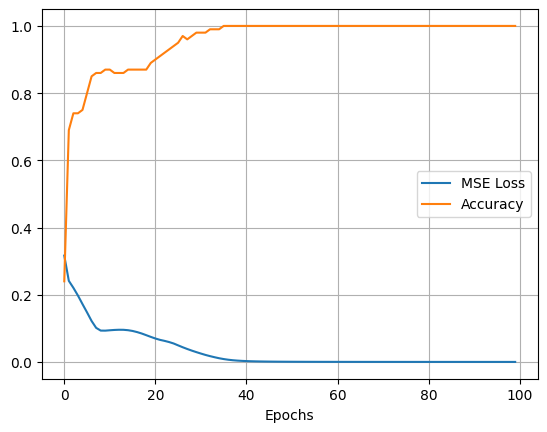

In [7]:
plt.plot(losses, label='MSE Loss')
plt.plot(accs, label='Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()